In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df_index = pd.read_csv('../economic_index.csv');
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis = 1, inplace = True)

In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

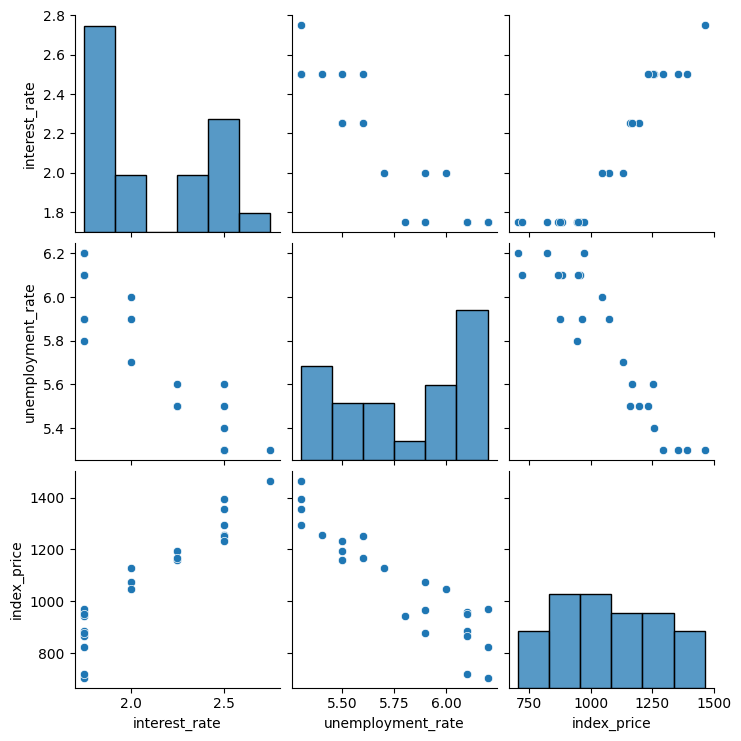

In [8]:
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


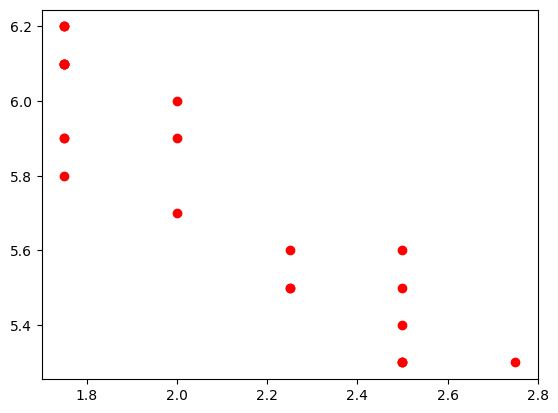

In [11]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')

In [39]:
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [14]:
X,y

(    interest_rate  unemployment_rate
 0            2.75                5.3
 1            2.50                5.3
 2            2.50                5.3
 3            2.50                5.3
 4            2.50                5.4
 5            2.50                5.6
 6            2.50                5.5
 7            2.25                5.5
 8            2.25                5.5
 9            2.25                5.6
 10           2.00                5.7
 11           2.00                5.9
 12           2.00                6.0
 13           1.75                5.9
 14           1.75                5.8
 15           1.75                6.1
 16           1.75                6.2
 17           1.75                6.1
 18           1.75                6.1
 19           1.75                6.1
 20           1.75                5.9
 21           1.75                6.2
 22           1.75                6.2
 23           1.75                6.1,
 0     1464
 1     1394
 2     1357
 3     1293
 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[-0.90115511,  0.37908503],
        [ 1.31077107, -1.48187786],
        [-0.90115511,  1.30956648],
        [ 1.31077107, -0.55139641],
        [ 1.31077107, -1.48187786],
        [-0.16384638,  0.68924552],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -1.48187786],
        [ 1.31077107, -1.17171738],
        [-0.90115511,  1.30956648],
        [-0.90115511,  0.999406  ],
        [-0.90115511,  0.37908503],
        [-0.90115511,  0.999406  ],
        [ 0.57346234, -0.8615569 ],
        [-0.16384638, -0.24123593],
        [-0.90115511,  0.06892455],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -0.8615569 ]]),
 array([[ 0.36115756, -0.82078268],
        [-1.08347268,  1.33377186],
        [ 1.8057878 , -1.43636969],
        [-1.08347268,  1.02597835],
        [-0.36115756,  0.41039134],
        [ 0.36115756, -0.51298918]]))

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [42]:
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [47]:
np.mean(validation_score )


np.float64(-5914.82818016239)

In [48]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [50]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010254


In [52]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predict = model.predict(X_test)
predict

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [53]:
print(predict)
print(model.summary())

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 21 Aug 2025   Prob (F-statistic):                       0.754
Time:                        23:07:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

d:\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
